# Lightgbm

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from lightgbm.sklearn import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

Duplicate key in file '/Users/ankitpatel/.matplotlib/matplotlibrc' line #2.
In /Users/ankitpatel/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/ankitpatel/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/ankitpatel/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
/Users/ankitpatel/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command

In [2]:
# Dataframe
path_df = "data_sub_1.pkl"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

(1456, 300)
(258, 300)


In [5]:
lgbm_0=LGBMClassifier(objective='LGBMClassifier',random_state=123)

print('Parameters currently in use:\n')
pprint(lgbm_0.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'LGBMClassifier',
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


### tuning the below params:
* n_estimators
* learning_rate
* boosting_type
* colsample_bytree
* reg_lambda
* min_child_samples

## Randomized search cv

In [6]:
# n_estimators
n_estimators = [200, 1000]

# min_samples_split
min_child_samples = [20, 30, 50]

# min_samples_leaf
colsample_bytree = [0.5,1.]

# learning rate
learning_rate = [.1, .5]

# subsample
reg_lambda = [0.1,0.3,0.5]

# boosting_type
boosting_type=['gbdt','dart','rf']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_child_samples': min_child_samples,
               'colsample_bytree': colsample_bytree,
               'learning_rate': learning_rate,
               'reg_lambda': reg_lambda,
               'boosting_type': boosting_type}

pprint(random_grid)

{'boosting_type': ['gbdt', 'dart', 'rf'],
 'colsample_bytree': [0.5, 1.0],
 'learning_rate': [0.1, 0.5],
 'min_child_samples': [20, 30, 50],
 'n_estimators': [200, 1000],
 'reg_lambda': [0.1, 0.3, 0.5]}


In [7]:
lgbm = LGBMClassifier(random_state=123)
# Definition of the random search
random_search = RandomizedSearchCV(estimator=lgbm,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  7.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=123, reg_alpha=0.0,
                                            reg_lambda=0.0, silen...
                                            subsample_freq=0),
                   iid='deprecated', n_iter=50, n_jobs=None,
 

In [8]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_) 

The best hyperparameters from Random Search are:
{'reg_lambda': 0.1, 'n_estimators': 200, 'min_child_samples': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}

The mean accuracy of a model with these hyperparameters is:
0.9484988615954634


In [28]:
# Create the parameter grid based on the results of random search 
reg_lambda = [0.1, 0.2, 0.3]
n_estimators = [100,200,400]
min_child_samples = [10,20,30]
learning_rate = [0.01,0.05,0.1]
colsample_bytree = [0.3,0.5,0.7]
boosting_type = ['gbdt']

param_grid = {
               'n_estimators': n_estimators,
               'min_child_samples': min_child_samples,
               'colsample_bytree': colsample_bytree,
               'learning_rate': learning_rate,
               'reg_lambda': reg_lambda,
               'boosting_type': boosting_type
}

# Create a base model
lgbm = LGBMClassifier(random_state=123)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lgbm, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed: 46.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, obj...
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [

In [29]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'boosting_type': 'gbdt', 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'min_child_samples': 10, 'n_estimators': 200, 'reg_lambda': 0.2}

The mean accuracy of a model with these hyperparameters is:
0.9535689535689537


In [11]:
best_lgbmc = grid_search.best_estimator_

In [12]:
best_lgbmc

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Model fit on training set

In [13]:
best_lgbmc.fit(features_train, labels_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
lgbmc_pred = best_lgbmc.predict(features_test)

### Training accuracy

In [15]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_lgbmc.predict(features_train)))

The training accuracy is: 
1.0


### Testing accuracy

In [16]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, lgbmc_pred))

The test accuracy is: 
0.9457364341085271


In [17]:
# Classification report
print("Classification report")
print(classification_report(labels_test,lgbmc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        69
           1       0.98      0.93      0.96        60
           2       0.93      0.97      0.95        69
           3       0.94      0.98      0.96        60

    accuracy                           0.95       258
   macro avg       0.95      0.95      0.95       258
weighted avg       0.95      0.95      0.95       258



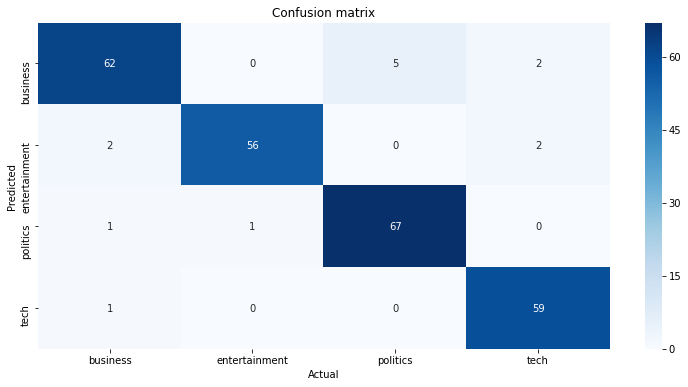

In [18]:
aux_df = df[['cat', 'cat_code']].drop_duplicates().sort_values('cat_code')
conf_matrix = confusion_matrix(labels_test, lgbmc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['cat'].values, 
            yticklabels=aux_df['cat'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### Base model

In [21]:
base_model=LGBMClassifier(random_state = 123)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9534883720930233

### Best fit model

In [20]:
best_lgbmc.fit(features_train, labels_train)
accuracy_score(labels_test, best_lgbmc.predict(features_test))

0.9457364341085271

In [24]:
d = {
     'Model': 'Light Gradient Boosting',
     'Training Set Accuracy': accuracy_score(labels_train, base_model.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, base_model.predict(features_test))
}

df_models_lgbmc = pd.DataFrame(d, index=[0])

In [25]:
df_models_lgbmc

Model  Training Set Accuracy  Test Set Accuracy
0  Light Gradient Boosting                    1.0           0.953488

In [30]:
with open('Models/best_lgbmc.pickle', 'wb') as output:
    pickle.dump(base_model, output)
    
with open('Models/df_models_lgbmc.pickle', 'wb') as output:
    pickle.dump(df_models_lgbmc, output)